# Predicting Hospital Readmission for Diabetes Patients

## Introduction
The effective management of chronic diseases is a critical challenge in healthcare systems worldwide. Among these chronic conditions, diabetes poses a significant burden on individuals and healthcare providers due to its high prevalence and associated complications. Hospital readmission rates for diabetes patients, particularly within a short time frame, are indicative of suboptimal care coordination, disease management, and patient outcomes.

The ability to accurately predict hospital readmissions for diabetes patients can play a vital role in improving patient care, optimizing healthcare resource allocation, and reducing healthcare costs. By identifying individuals at higher risk of readmission, healthcare providers can implement targeted interventions, timely follow-up care, and personalized treatment plans to minimize the likelihood of readmission and enhance patient outcomes.

In this project, we aim to develop a predictive model using machine learning techniques to forecast hospital readmission for diabetes patients. By analyzing a comprehensive dataset of patient demographics, clinical variables, medications, and encounter information, we will explore the factors that contribute to readmission risk and build a robust predictive model. The project will involve data preprocessing, feature engineering, model selection, and evaluation to create a reliable tool for healthcare professionals to identify patients who may benefit from targeted interventions and proactive care management.

The insights gained from this project have the potential to inform healthcare providers, policymakers, and researchers about the factors influencing hospital readmissions for diabetes patients. By harnessing the power of data-driven approaches, we can enhance the quality of care, optimize resource utilization, and ultimately improve patient outcomes in the management of diabetes.

## Scoping

### Project goals
The goal of this project is to develop a machine learning model that predicts the likelihood of hospital readmission for patients with diabetes. The model can assist healthcare providers in identifying high-risk patients and implementing proactive measures to prevent readmissions, improve patient outcomes, and optimize resource allocation.

### Data
This data comes from UCI Machine Learning Repository, "Diabetes 130-US hospitals for years 1999-2008" by  Clore, Krzysztof Cios, Jon DeShazo, and Beata Strack.

### Analysis
This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Also, select relevant features for the prediction model using techniques such as statistical tests, correlation analysis, or domain knowledge to identify the most predictive variables. Apply machine learning algorithms (such as logistic regression, random forest, or gradient boosting) to develop a predictive model for hospital readmission.

### Evaluation
 Evaluate the performance of the model using appropriate evaluation metrics such as accuracy, precision, recall, and area under the ROC curve. Assess the model's ability to correctly predict hospital readmission and its generalizability.

## Import Python Modules

First import the modules being used for this project:

In [39]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

To analyze the the data, `pandas` will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

In [40]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Data Characteristics

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1.	It is an inpatient encounter (a hospital admission).
2.	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3.	The length of stay was at least 1 day and at most 14 days.
4.	Laboratory tests were performed during the encounter.
5.	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

The columns in the dataset include: 

- **encounter_id:** Unique identifier of an encounter
- **patient_nbr:** Unique identifier of a patient
- **race:** Values: `Caucasian`, `Asian`, `African American`, `Hispanic`, and `other`
- **gender:** Values: `male`, `female`, and `unknown/invalid`
- **age:** Grouped in 10-year intervals: `[0, 10)`, `[10, 20)`,..., `[90, 100)`
- **weight:** Weight in pounds, separated by intervals like `'[0-25)'`, `'[25-50)'`,..., `'>200'`
- **admission_type_id:** Integer identifier corresponding to 9 distinct values, for example, `emergency`, `urgent`, `elective`, `newborn`, and `not available`
- **discharge_disposition_id:** Integer identifier corresponding to 29 distinct values, for example, `discharged to home`, `expired`, and `not available`
- **admission_source_id:** Integer identifier corresponding to 21 distinct values, for example, `physician referral`, `emergency room`, and `transfer from a hospital`
- **time_in_hospital:** Integer number of days between admission and discharge
  
- **payer_code:** Integer identifier corresponding to 23 distinct values, for example, `Blue Cross/Blue Shield`, `Medicare`, and `self-pay`
- **medical_specialty:** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, `cardiology`, `internal medicine`, `family/general practice`, and `surgeon`
- **num_lab_procedures:** Number of lab tests performed during the encounter
- **num_procedures:** Number of procedures (other than lab tests) performed during the encounter
- **num_medications:** Number of distinct generic names administered during the encounter
- **number_outpatient:** Number of outpatient visits of the patient in the year preceding the encounter
- **number_emergency:** Number of emergency visits of the patient in the year preceding the encounter
- **number_inpatient:** Number of inpatient visits of the patient in the year preceding the encounter
- **diag_1:** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
- **diag_2:** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
- **diag_3:** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
- **number_diagnoses:** Number of diagnoses entered to the system
- **max_glu_serum:** Indicates the range of the result or if the test was not taken. Values: `>200`, `>300`, `normal`, and `none` if not measured
- **A1Cresult:** Indicates the range of the result or if the test was not taken. Values: `>8` if the result was greater than 8%, `>7` if the result was greater than 7% but less than 8%, `normal` if the result was less than 7%, and `none` if not measured

For these features, they have the same description:

'The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: `up` if the dosage was increased during the encounter, `down` if the dosage was decreased, `steady` if the dosage did not change, and `no` if the drug was not prescribed'

- **metformin** 
- **repaglinide** 
- **nateglinide**
- **chlorpropamide**
- **glimepiride**
- **acetohexamide**
- **glipizide**
- **glyburide**
- **tolbutamide**
- **pioglitazone**
- **rosiglitazone**
- **acarbose**
- **miglitol**
- **troglitazone**
- **tolazamide**
- **examide**
- **citoglipton**
- **insulin**
- **glyburide.metformin**
- **glipizide.metformin**
- **glimepiride.pioglitazone**
- **metformin.rosiglitazone**
- **metformin.pioglitazone**

(End of identical descriptions)

- **change:** Indicates if there was a change in diabetic medications (either dosage or generic name). Values: `change` and `no change`
- **diabetesMed:** Indicates if there was any diabetic medication prescribed. Values: `yes` and `no`
- **readmitted:** Days to inpatient readmission. Values: `<30` if the patient was readmitted in less than 30 days, `>30` if the patient was readmitted in more than 30 days, and `No` for no record of readmission.

This is some additional information on `ID`s for certain features.

**admission_type_id**:
  - 1: Emergency
  - 2: Urgent
  - 3: Elective
  - 4: Newborn
  - 5: Not Available
  - 6: NULL
  - 7: Trauma Center
  - 8: Not Mapped
  
**discharge_disposition_id**
  - 1: Discharged to home
  - 2: Discharged/transferred to another short term hospital
  - 3: Discharged/transferred to SNF
  - 4: Discharged/transferred to ICF
  - 5: Discharged/transferred to another type of inpatient care institution
  - 6: Discharged/transferred to home with home health service
  - 7: Left AMA
  - 8: Discharged/transferred to home under care of Home IV provider
  - 9: Admitted as an inpatient to this hospital
  - 10: Neonate discharged to another hospital for neonatal aftercare
  - 11: Expired
  - 12: Still patient or expected to return for outpatient services
  - 13: Hospice / home
  - 14: Hospice / medical facility
  - 15: Discharged/transferred within this institution to Medicare approved swing bed
  - 16: Discharged/transferred/referred another institution for outpatient services
  - 17: Discharged/transferred/referred to this institution for outpatient services
  - 18: NULL
  - 19: "Expired at home. Medicaid only, hospice."
  - 20: "Expired in a medical facility. Medicaid only, hospice."
  - 21: "Expired, place unknown. Medicaid only, hospice."
  - 22: Discharged/transferred to another rehab fac including rehab units of a hospital.
  - 23: Discharged/transferred to a long term care hospital.
  - 24: Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
  - 25: Not Mapped
  - 26: Unknown/Invalid
  - 27: Discharged/transferred to a federal health care facility.
  - 28: Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
  - 29: Discharged/transferred to a Critical Access Hospital (CAH).
  - 30: Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

**admission_source_id**
  - 1: Physician Referral
  - 2: Clinic Referral
  - 3: HMO Referral
  - 4: Transfer from a hospital
  - 5: Transfer from a Skilled Nursing Facility (SNF)
  - 6: Transfer from another health care facility
  - 7: Emergency Room
  - 8: Court/Law Enforcement
  - 9: Not Available
  - 10: Transfer from critial access hospital
  - 11: Normal Delivery
  - 12: Premature Delivery
  - 13: Sick Baby
  - 14: Extramural Birth
  - 15: Not Available
  - 17: NULL
  - 18: Transfer From Another Home Health Agency
  - 19: Readmission to Same Home Health Agency
  - 20: Not Mapped
  - 21: Unknown/Invalid
  - 22: Transfer from hospital inpt/same fac reslt in a sep claim
  - 23: Born inside this hospital
  - 24: Born outside this hospital
  - 25: Transfer from Ambulatory Surgery Center
  - 26: Transfer from Hospice

## Explore the Data

First we want to look for missing data. We can use `.dtypes()` to return the data types of each column in the DataFrame `df`.

In [41]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

There are a lot of columns with object types which typically represents string values in pandas. This could also indicate a mixture of strings, integers, or NULLs in the columns. Let's check for missing data first using `.isnull()`

In [42]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

There is no missing data values, so it still could be a mixture of strings and integers. Let's take a closer look at the first `object` type column `race`.

In [43]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

Looks to be just strings in here, although later we will address the `'?'` value in the `race` column. Let's try to look at a few more to make sure there isn't anything to take care of.

In [44]:
df.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [45]:
df.medical_specialty.unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [46]:
df.diag_1.unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

In [47]:
df.insulin.unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [48]:
df.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

Looks to be just strings in `object` labeled columns, although there is `'?'s` for presumptively missing data in place of `NULL`s. 

#### Race and Readmittance

Let's take a peek at some of the relationship between some of these columns with the `'readmitted'` column.

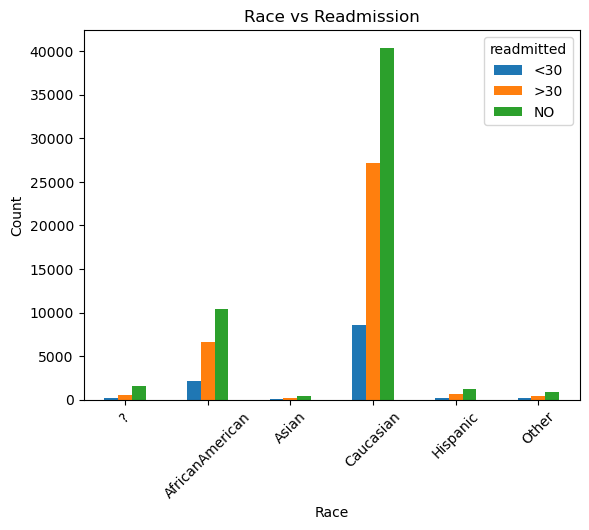

In [49]:
# Setup data for plotting
race_readmitted = df.groupby(['race', 'readmitted']).size().unstack()

# Plot the grouped bar plot
race_readmitted.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Readmission Status by Race')

plt.xticks(rotation=45)

# Display the plot
plt.show()

As a reminder of the keys for `readmitted`:

- `<30` if the patient was readmitted in less than 30 days
- `>30` if the patient was readmitted in more than 30 days
- `NO` for no record of readmission.

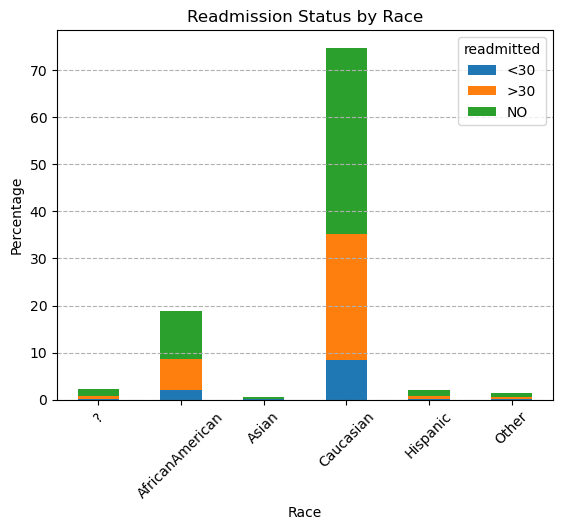

In [66]:
# Calculate the total count of all categories
total_count = df.groupby('readmitted').size().sum()

# Setup data for plotting
race_readmitted = df.groupby(['race', 'readmitted']).size().unstack()

# Calculate the overall proportion by dividing each count by the total count of all categories
proportion_race_readmitted = race_readmitted.div(total_count) * 100

# Plot the grouped bar plot
ax = proportion_race_readmitted.plot(kind='bar', stacked=True)

# Add labels and title
ax.set_xlabel('Race')
ax.set_ylabel('Percentage')
ax.set_title('Readmission Status by Race')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add y-axis grids
ax.yaxis.grid(True, linestyle='--', zorder=0)

# Display the plot
plt.show()

Something that seems off is the proportion of `Hispanic` in the Dataset. According to the [U.S. Census July 1, 2022](https://www.census.gov/quickfacts/fact/table/US/PST045222), the `Hispanic` proportion is 19.1%, `Asian` alone is 6.3%, `African American` is 13.6%, and `White` is 58.9%. The discrepancy with this Dataset could be a few things, one being, for example, that people who are both `Hispanic` and `Caucasian` were labeled as just `Caucasian`. Another possibility is that `Hispanic` people are not using healthcare services as much as there counterparts. Another cause could be that `Hispanic` people don't suffer as much with Diabetes compared to other Races, although given the numbers from [diabetes.org](https://diabetes.org/about-us/statistics/about-diabetes), that doesn't seem to be the case. Similar arguments could be made for the `Asian` demographic.

This [article](https://www.kff.org/coronavirus-covid-19/poll-finding/health-and-health-care-experiences-of-hispanic-adults/) might shed some light on the issue. The conclusion is these findings show that, consistent with research from prior to the pandemic, `Hispanic` adults are more likely to be uninsured than their `Caucasian` counterparts. They also are less likely to have a usual source of care other than an emergency room and to rely on community health centers as their source of care.

#### Weight and Readmittance

Let's take a look at weight and readmittance of patients with Diabetes.

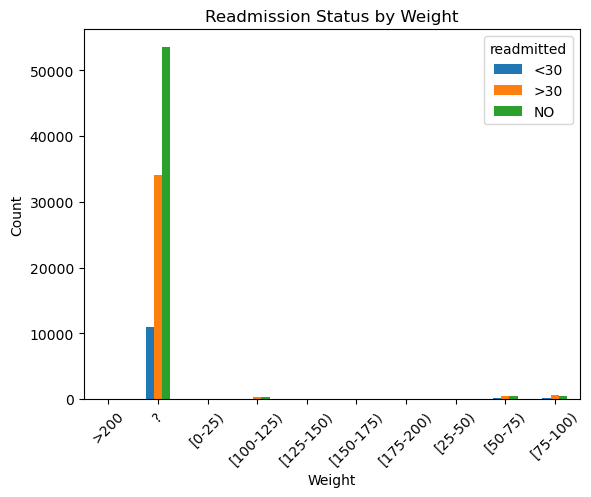

In [68]:
# Setup data for plotting
race_readmitted = df.groupby(['weight', 'readmitted']).size().unstack()

# Plot the grouped bar plot
race_readmitted.plot(kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Readmission Status by Weight')

plt.xticks(rotation=45)

# Display the plot
plt.show()

Just taking a glance, it doesn't seem `weight` was taken to account for most of these admissions. Weight, if measured, could be a indicator for high risk patients. For model creation purposes though, we will exclude `weight` from the rest of the analysis due to lack of data.